In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np                                                                                                          
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
IMAGE_SIZE = [224, 224]

train_path = '/kaggle/input/skin-burn-degreese/data/train'
valid_path = '/kaggle/input/skin-burn-degreese/data/test'

In [3]:
vgg = tf.keras.applications.vgg19.VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [4]:
folders = glob('train')

In [5]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)

In [6]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('/kaggle/input/skin-burn-degreese/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/kaggle/input/skin-burn-degreese/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 920 images belonging to 3 classes.
Found 540 images belonging to 3 classes.


In [13]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
29/29 [==============================] - 31s 724ms/step - loss: 1.2987 - accuracy: 0.5424 - val_loss: 0.8623 - val_accuracy: 0.6426
Epoch 2/50
29/29 [==============================] - 14s 485ms/step - loss: 0.8035 - accuracy: 0.6554 - val_loss: 0.5770 - val_accuracy: 0.7407
Epoch 3/50
29/29 [==============================] - 13s 465ms/step - loss: 0.6261 - accuracy: 0.7457 - val_loss: 0.4467 - val_accuracy: 0.8370
Epoch 4/50
29/29 [==============================] - 15s 509ms/step - loss: 0.5385 - accuracy: 0.7837 - val_loss: 0.4665 - val_accuracy: 0.8278
Epoch 5/50
29/29 [==============================] - 13s 463ms/step - loss: 0.5412 - accuracy: 0.7663 - val_loss: 0.3792 - val_accuracy: 0.8574
Epoch 6/50
29/29 [==============================] - 13s 464ms/step - loss: 0.5103 - accuracy: 0.7924 - val_loss: 0.5239 - val_accuracy: 0.7889
Epoch 7/50
29/29 [==============================] - 14s 485ms/step - loss: 0.4302 - accuracy: 0.8239 - val_loss: 0.3207 - val_accuracy: 0.8815

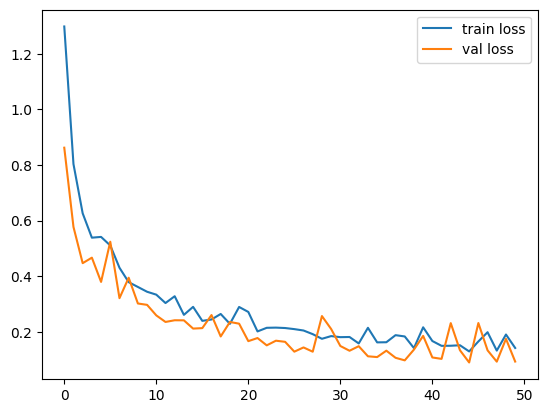

<Figure size 640x480 with 0 Axes>

In [14]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

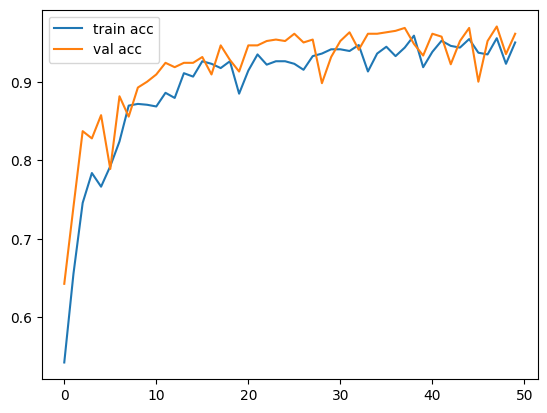

<Figure size 640x480 with 0 Axes>

In [15]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
model.save('my_model.h5')

In [17]:
model_json = model.to_json()
with open("model.json", "w") as j_file:
    j_file.write(model_json)